In [23]:
import os

# Define the directory structure
structure = {
    '_layouts': [],  # Layouts folder exists already
    '_includes': [],  # Include partials
    'assets': ['css', 'js', 'images'],  # Folder for stylesheets, scripts, and images
    'css': [],
    'js': [],
    'images': []
}

# Create directories based on the structure
for folder, subfolders in structure.items():
    os.makedirs(folder, exist_ok=True)  # Create main folders
    for subfolder in subfolders:
        os.makedirs(os.path.join(folder, subfolder), exist_ok=True)  # Create subfolders if any

In [6]:
!pwd

/Users/kushalkumar/Documents/mpga_draft


In [8]:
import os
import subprocess

# Define the directory containing Word documents
directory = "./documents/_delhi_2024"
directory = "./documents/_bengaluru_2024"

# Default author
default_author = "volunteer nerd"

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".docx"):
        # Define input and output file paths
        input_path = os.path.join(directory, filename)
        output_filename = filename.replace(".docx", ".md")
        output_path = os.path.join(directory, output_filename)

        # Convert Word document to Markdown using Pandoc
        subprocess.run(["pandoc", input_path, "-o", output_path])

        # Add default author metadata to the Markdown file
        with open(output_path, 'r') as file:
            content = file.read()

        with open(output_path, 'w') as file:
            # Add author metadata at the beginning of the file
            file.write(f"---\nauthor: {default_author}\n---\n\n")
            file.write(content)

print("Conversion completed.")

Conversion completed.


In [24]:
# Create two subpages: 'Submit an Issue' and 'Find POC' in Markdown format
subpages = {
    'submit-issue.md': '''---
layout: page
title: Submit an Issue
nav_order: 2
---

# Submit an Issue

To submit an issue, please fill out the form below to provide details about your civic concern.''',
    'find-poc.md': '''---
layout: page
title: Find Your POC
nav_order: 3
---

# Find Your POC

Use this page to find the Point of Contact for various civic issues in your area. Access contact details and assistance resources here.''',
    'about-us.md': '''---
layout: page
title: About Us
nav_order: 4
---

# About Us

Welcome to the MPGA project. Here you can learn more about our mission, vision, and the team behind this initiative.'''
}

# Create subpages in the root directory
for filename, content in subpages.items():
    with open(filename, 'w') as file:
        file.write(content)

In [2]:
!pip3 install requests

Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     |████████████████████████████████| 120 kB 2.0 MB/s eta 0:00:01
  Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import requests

# Constants
CSV_URL = 'https://facilmap.org/sj19ktJypCpd/csv/24639'
LOCAL_CSV_PATH = 'issues.csv'

# Fetch CSV data
response = requests.get(CSV_URL)

# Save CSV data locally
if response.status_code == 200:
    with open(LOCAL_CSV_PATH, 'w') as file:
        file.write(response.text)
    print('CSV data fetched and saved to', LOCAL_CSV_PATH)
else:
    print('Failed to fetch the CSV data. Status code:', response.status_code)

/Users/kushalkumar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


CSV data fetched and saved to issues.csv


In [5]:
df.columns

Index(['Name', 'Party', 'State', 'Constituency', 'Age', 'Present Address',
       'Education', 'Profession', 'Sansad URL', 'Positions Held', 'Member ID',
       'Google Maps Link', 'Position', 'Latitude', 'Longitude', 'Email_0',
       'Email_1', 'Phone Permanent_0', 'Phone Permanent_1'],
      dtype='object')

In [12]:
df

,Name,Party,State,Constituency,Age,Present Address,Education,Profession,Sansad URL,Positions Held,Member ID,Google Maps Link,Position,Latitude,Longitude,Email_0,Email_1,Phone Permanent_0,Phone Permanent_1
0,Thiru D M Kathir Anand,Dravida Munnetra Kazhagam,Tamil Nadu,Vellore,49,"1202 Yamuna, 12th Floor, Dr. Bisamber Dass Mar...",M.B.A. (USA) International Business Educated ...,Businessperson,https://sansad.in/ls/members/biography/5528?fr...,"Elected to 18th Lok Sabha, Member, Consultativ...",5528,https://www.google.com/maps/search/?api=1&quer...,"28.6412763,77.1855679",28.641276,77.185568,dmk.kathir@sansad.nic.in,NaN,Tel : (0416) 2249799,09842329999 (M)
1,Shri Kiren Rijiju,Bharatiya Janata Party,Arunachal Pradesh,Arunachal West,52,9 K.M. Marg New Delhi NCT of Delhi 110001 Tel ...,"B.A., LL.B.",Social Worker,https://sansad.in/ls/members/biography/3972?fr...,"Elected to 18th Lok Sabha, Union Minister of F...",3972,https://www.google.com/maps/search/?api=1&quer...,"28.63496,77.218791",28.634960,77.218791,kiren.rijiju@sansad.nic.in,krijiju@gmail.com,Tel : (0360) 2292204,09818671114 (M)
2,Shri Arjun Ram Meghwal,Bharatiya Janata Party,Rajasthan,Bikaner (SC),70,"5-A, , K. Kamraj Marg, City New Delhi, NCT of...","M.A. (Pol. Science), LL.B., M.B.A Educated a...",Social Worker,https://sansad.in/ls/members/biography/4399?fr...,"Elected to 18th Lok Sabha, Union Minister of S...",4399,https://www.google.com/maps/search/?api=1&quer...,"28.63496,77.218791",28.634960,77.218791,arjunrammeghwal@gmail.com,ar.meghwal@sansad.nic.in,Telefax : (0151) 2230260,09414075910 (M)
3,Shri Ram Shiromani Verma,Samajwadi Party,Uttar Pradesh,Shrawasti,48,"A-15 Tower B1, DDU Marg New Delhi NCT of Delhi...","B.A., LL.B. Educated at Dr. Ram Manohar Lohia...",Agriculturist &amp; Politics,https://sansad.in/ls/members/biography/5164?fr...,"Elected to 18th Lok Sabha, Member, Consultativ...",5164,https://www.google.com/maps/search/?api=1&quer...,"28.6318547,77.2332453",28.631855,77.233245,ram.shiromani@sansad.nic.in,NaN,09838127700 (M),9013997461
4,Dr. Virendra Kumar,Bharatiya Janata Party,Madhya Pradesh,Tikamgarh (SC),70,"H No.: 04, Janpath,, City: New Delhi, NCT of D...","M.A. (Economics), Ph.D (Child Labour) Educated...",Social Worker,https://sansad.in/ls/members/biography/515?fro...,"Elected to 18th Lok Sabha, Union Cabinet Minis...",515,https://www.google.com/maps/search/?api=1&quer...,"28.6294551,77.2194846",28.629455,77.219485,vkumar@sansad.nic.in,office.mptkg@gmail.com,Tel : (07582) 224000,08989235225 (M)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Shri Isha Khan Choudhury,Indian National Congress,West Bengal,Maldaha Dakshin,53,NaN,B.A.,Businessperson,https://sansad.in/ls/members/biography/5834?fr...,"Elected to 18th Lok Sabha, MLA",5834,NaN,NaN,NaN,NaN,khanchy12@gmail.com,isha.khan@sansad.nic.in,9830065081,NaN
535,Shri Bapi Haldar,All India Trinamool Congress,West Bengal,Mathurapur (SC),37,NaN,BA,NaN,https://sansad.in/ls/members/biography/5774?fr...,Elected to 18th Lok Sabha,5774,NaN,NaN,NaN,NaN,bapihaldar04@gmail.com,bapihaldar.04@sansad.nic.in,8016600911,NaN
536,Smt. June Maliah,All India Trinamool Congress,West Bengal,Medinipur,54,NaN,X,Actor,https://sansad.in/ls/members/biography/5816?fr...,"Elected to 18th Lok Sabha, Chairman of the Sta...",5816,NaN,NaN,NaN,NaN,junemaliah@yahoo.com,june.maliah@sansad.nic.in,9903147821,NaN
537,Shri Kartick Chandra Paul,Bharatiya Janata Party,West Bengal,Raiganj,49,NaN,B.com,Businessperson,https://sansad.in/ls/members/biography/5691?fr...,Elected to 18th Lok Sabha,5691,NaN,NaN,NaN,NaN,kp2426502@gmail.com,kartickpaul.mp@sansad.nic.in,9434743351,NaN


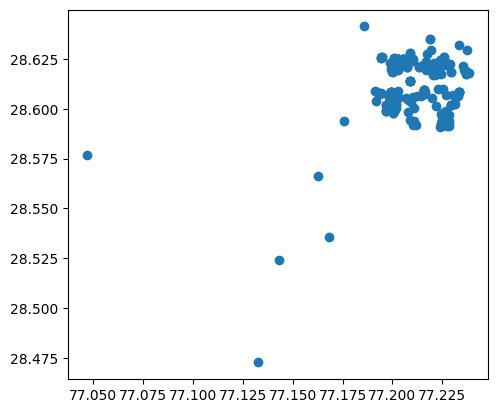

/Users/kushalkumar/Library/Python/3.9/lib/python/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Excel file
xlsx_file_path = '/Users/kushalkumar/Documents/mpga_draft/data/18th_Lok_Sabha_MPs_final.xlsx'
df = pd.read_excel(xlsx_file_path)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

# rename Name to name column 
gdf.rename(columns={'Name':'name'}, inplace=True)

# add crs? 

# Plot the GeoDataFrame
gdf.plot()
plt.show()

# Save the GeoDataFrame to a GeoJSON file
geojson_file_path = '/Users/kushalkumar/Documents/mpga_draft/data/18th_Lok_Sabha_MPs_final.geojson'


gdf.to_file(geojson_file_path, driver='GeoJSON')

# Download the 'naturalearth_lowres' dataset from Natural Earth
# and save it to a local file path, e.g., '/path/to/naturalearth_lowres.shp'


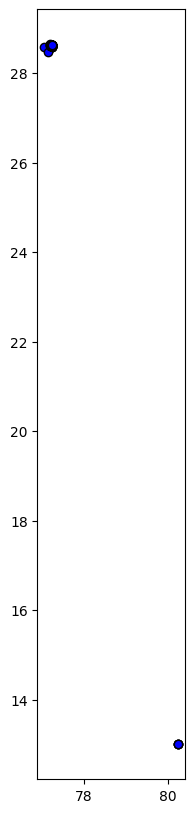

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# URL of the GeoJSON file
geojson_url = "https://facilmap.org/UG0QGgQp83Ns/geojson"

# Read the GeoJSON file
gdf = gpd.read_file(geojson_url)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')

plt.show()

In [20]:
gdf

,name,colour,size,icon,shape,data,typeId,geometry
0,Teest,ff0000,30,,,"{ ""Description"": ""loresm i[psum"" }",24612,POINT (80.23458 13.01166)
1,aswesom,ff0000,30,,,{ },24612,POINT (80.24953 13.00713)
2,one more,ff0000,30,,,{ },24612,POINT (80.23772 13.00805)
3,samba,34ff34,30,,star,"{ ""Who?"": ""bassy"" }",24621,POINT (80.24283 13.00692)
4,Point,3166ff,22,,diamond,"{ ""Name"": ""Shri Bishnu Pada Ray"", ""Party"": ""Bh...",24635,POINT (77.20746 28.6211)
...,...,...,...,...,...,...,...,...
267,Point,3166ff,22,,diamond,"{ ""Name"": ""Md Abu Taher Khan"", ""Party"": ""All I...",24635,POINT (77.203 28.62482)
268,Point,3166ff,22,,diamond,"{ ""Name"": ""Shri Jyotirmay Singh Mahato"", ""Part...",24635,POINT (77.21573 28.60923)
269,Point,3166ff,22,,diamond,"{ ""Name"": ""Shri Jagannath Sarkar"", ""Party"": ""B...",24635,POINT (77.20421 28.62386)
270,Point,3166ff,22,,diamond,"{ ""Name"": ""Shri Kalyan Banerjee"", ""Party"": ""Al...",24635,POINT (77.19983 28.61931)


In [14]:
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 250 kB 2.3 MB/s eta 0:00:01
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
import asyncio
import aiohttp
from urllib.parse import urljoin
import json

class FacilMapClient:
    def __init__(self, base_url="https://facilmap.org/"):
        self.base_url = base_url
        self.session = None
        self.map_data = None

    async def create_map(self):
        async with aiohttp.ClientSession() as self.session:
            # Create new map
            map_config = {
                "title": "India Civic Issues Tracker",
                "description": """
                Track civic issues across India by PIN code.
                L1: National Level (MPs/Ministers)
                L2: State Level (MLAs/Ministers)
                L3: Local Level (Collector/Panchayat)
                """,
                "clusterMarkers": True,
            }
            
            async with self.session.post(
                urljoin(self.base_url, "api/map"), 
                json=map_config
            ) as response:
                self.map_data = await response.json()
                
            # Create marker types for different levels
            marker_types = {
                "L1-National": {
                    "name": "L1-National",
                    "type": "marker",
                    "defaultSize": 35,
                    "fields": [
                        {"name": "issue_title", "type": "text", "default": ""},
                        {"name": "description", "type": "textarea", "default": ""},
                        {"name": "level", "type": "dropdown", "options": ["Policy", "Implementation"]},
                        {"name": "status", "type": "dropdown", 
                         "options": ["Open", "In Progress", "Escalated", "Resolved", "Blocked"]},
                        {"name": "votes", "type": "number", "default": 0},
                        {"name": "affected_pincodes", "type": "text"},
                        {"name": "poc_name", "type": "text"},
                        {"name": "poc_contact", "type": "text"},
                        {"name": "escalation_history", "type": "textarea"},
                        {"name": "created_date", "type": "text"},
                        {"name": "last_updated", "type": "text"}
                    ]
                },
                "L2-State": {
                    "name": "L2-State",
                    "type": "marker",
                    "defaultSize": 30,
                    "fields": [
                        {"name": "issue_title", "type": "text", "default": ""},
                        {"name": "description", "type": "textarea", "default": ""},
                        {"name": "department", "type": "text"},
                        {"name": "status", "type": "dropdown", 
                         "options": ["Open", "In Progress", "Escalated", "Resolved", "Blocked"]},
                        {"name": "votes", "type": "number", "default": 0},
                        {"name": "affected_pincodes", "type": "text"},
                        {"name": "poc_name", "type": "text"},
                        {"name": "poc_contact", "type": "text"},
                        {"name": "escalation_history", "type": "textarea"},
                        {"name": "created_date", "type": "text"},
                        {"name": "last_updated", "type": "text"}
                    ]
                },
                "L3-Local": {
                    "name": "L3-Local",
                    "type": "marker",
                    "defaultSize": 25,
                    "fields": [
                        {"name": "issue_title", "type": "text", "default": ""},
                        {"name": "description", "type": "textarea", "default": ""},
                        {"name": "pincode", "type": "text"},
                        {"name": "category", "type": "dropdown", 
                         "options": ["Infrastructure", "Sanitation", "Education", "Healthcare", "Other"]},
                        {"name": "status", "type": "dropdown", 
                         "options": ["Open", "In Progress", "Escalated", "Resolved", "Blocked"]},
                        {"name": "votes", "type": "number", "default": 0},
                        {"name": "poc_name", "type": "text"},
                        {"name": "poc_contact", "type": "text"},
                        {"name": "resolution_steps", "type": "textarea"},
                        {"name": "created_date", "type": "text"},
                        {"name": "last_updated", "type": "text"}
                    ]
                }
            }

            # Add marker types
            for marker_type in marker_types.values():
                async with self.session.post(
                    urljoin(self.base_url, f"api/map/{self.map_data['id']}/type"),
                    json=marker_type
                ) as response:
                    await response.json()

            # Set initial view to India
            bbox = {
                "top": 35.5,
                "left": 68.1,
                "right": 97.4,
                "bottom": 6.5,
                "zoom": 5
            }
            
            async with self.session.post(
                urljoin(self.base_url, f"api/map/{self.map_data['id']}/bbox"),
                json=bbox
            ) as response:
                await response.json()

            return {
                "admin_url": f"{self.base_url}{self.map_data['adminId']}",
                "write_url": f"{self.base_url}{self.map_data['writeId']}",
                "read_url": f"{self.base_url}{self.map_data['id']}"
            }

async def main():
    client = FacilMapClient()
    urls = await client.create_map()
    
    print("\nMap Created Successfully!")
    print("\nIMPORTANT: Save these URLs:")
    print(f"Admin URL (keep secure): {urls['admin_url']}")
    print(f"Write URL (for contributors): {urls['write_url']}")
    print(f"Read URL (public): {urls['read_url']}")

if __name__ == "__main__":
    asyncio.run(main())


RuntimeError: asyncio.run() cannot be called from a running event loop

In [5]:
!pip3 install aiohttp

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 391 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 9.7 MB/s  eta 0:00:01
  Using cached async_timeout-4.0.3-py3-none-any.whl (5.7 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
     |████████████████████████████████| 91 kB 17.3 MB/s eta 0:00:01
  Using cached attrs-24.2.0-py3-none-any.whl (63 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
     |████████████████████████████████| 46 kB 11.2 MB/s eta 0:00:01
  Using cached idna-3.10-py3-none-any.whl (70 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
